In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [2]:
#f = r.TFile("./data/results_positionsVsTimeVsEnergy_finerBinning_9day.root")
#f = r.TFile("./data/results_positionsVsTimeVsEnergy_finerBinning_ReconEast_9day.root")
f = r.TFile("./data/results_eastPositionVsTime_EndGame_New.root")
f.cd("farline/calo2")
#f.ls()

xHistName = "xHitPositionsVsTimeVsEnergy"
yHistName = "yHitPositionsVsTimeVsEnergy"

In [3]:
calo = 8
hx = f.Get("farline").Get("calo"+str(calo)).Get(xHistName).Clone()
hy = f.Get("farline").Get("calo"+str(calo)).Get(yHistName).Clone()
hy.GetYaxis().SetTitle("y-position [xtals]")

In [4]:
f1 = r.TF1("f1","gaus",1,5)
f1.SetParameters(1,1,1)
f1.SetNpx(2000)

In [5]:
#fit function which rejects the regions near crystal centers
#    using TF1::RejectPoint()

def func2(x,p):
    if( x[0] % 1 < 0.52 and x[0] % 1 > 0.48):
        r.TF1.RejectPoint()
        return 0
    else:
        #gaussian: [0]*exp(-0.5*((x-[1])/[2])**2)
        return p[0]*r.TMath.Exp( -0.5*(((x[0]-p[1])/p[2])**2) )
    
f2 = r.TF1("f2", func2, 1, 5, 3)
f2.SetParNames("A", "#bar{x}", "#sigma")
f2.SetParameters(1,1,1)
f2.SetLineColor(6)
f2.SetNpx(2000)

In [6]:
f3 = r.TF1("f3",
#           "[0]*TMath::Sqrt(TMath::Pi() / 2.0)*[1]*( TMath::Erf(([2] + x - 2*[3])/(TMath::Sqrt(2)*[1])) + TMath::Erf(([2] - x + 2*[3])/(TMath::Sqrt(2)*[1])) )", 
           "[0]/2*( TMath::Erf(([2] + x - 2*[3])/(TMath::Sqrt(2)*[1])) + TMath::Erf(([2] - x + 2*[3])/(TMath::Sqrt(2)*[1])) )", 
           -45, 45, 4)
f3.SetParameters(1,1,1,1)
f3.SetParNames("A","#sigma_{gaus}","r_{square}","#bar{x}")
f3.SetNpx(2000)
f3.SetLineColor(6)

 FCN=2.29069e+07 FROM MIGRAD    STATUS=CONVERGED      78 CALLS          79 TOTAL
                     EDM=1.49333e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.6 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  A            1.80754e+06   1.06648e+02   5.34319e-01   1.39207e-07
   2  #bar{x}      3.05922e+00   1.11596e-04  -1.75500e-06   6.13894e+00
   3  #sigma       1.65623e+00   1.71698e-04  -1.04067e-07  -1.78623e+00


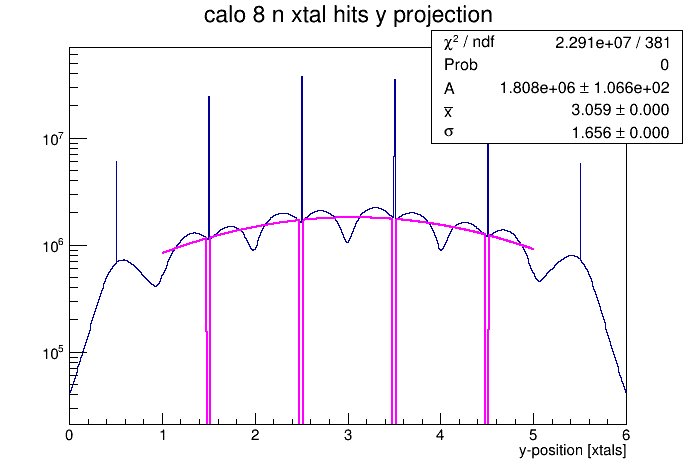

In [7]:
c = r.TCanvas()

hy.GetXaxis().UnZoom()
hy.GetZaxis().UnZoom()
hy_y = hy.Project3D("y").Clone()
hy_y.Draw()
f2.SetParameters(10**6,3,1.5)
hy_y.Fit(f2,"R")
#hy_y.GetXaxis().SetRangeUser(2.4,2.6)

#f2.Draw("same")

c.SetLogy()

c.Draw()

In [8]:
focus = "y"

if("y" in focus):
    h3 = hy
elif("x" in focus):
    h3 = hx
else:
    print("Error: please pick x or y")

In [9]:
NbinsEnergy = h3.GetNbinsZ()
NbinsTime = h3.GetNbinsX()
NbinsPosition = h3.GetNbinsY()

print(NbinsEnergy, NbinsTime, NbinsPosition)
energySlices = []
for bin in range(1,NbinsEnergy+1):
    h3.GetZaxis().SetRange(bin,bin)
    eMin = h3.GetZaxis().GetBinCenter(bin) - h3.GetZaxis().GetBinWidth(bin)/2.0
    eMax = h3.GetZaxis().GetBinCenter(bin) + h3.GetZaxis().GetBinWidth(bin)/2.0
    print(bin, eMin, eMax)
    hi = h3.Project3D("yx")#.Clone("hx_E"+str(bin).zfill(2))
    hi.SetTitle("Calo "+str(calo)+
                " Hit Positions vs. Time [ "+str(eMin)+" < E (MeV) < "+str(eMax)+" ]")
    energySlices.append(hi.Clone("h3_E"+str(bin).zfill(2)))

14 140 600
1 400.0 600.0
2 600.0 800.0
3 800.0 1000.0
4 1000.0 1200.0
5 1200.0 1400.0
6 1400.0 1600.0
7 1600.0 1800.0
8 1800.0 2000.0
9 2000.0 2200.0
10 2200.0 2400.0
11 2400.0 2600.0
12 2600.0 2800.0
13 2800.0 3000.0
14 3000.0 3200.0


In [10]:
print(energySlices)

[<ROOT.TH2D object ("h3_E01") at 0x7fffd5118440>, <ROOT.TH2D object ("h3_E02") at 0x7fffd51cf040>, <ROOT.TH2D object ("h3_E03") at 0x7fffd50fe3c0>, <ROOT.TH2D object ("h3_E04") at 0x7fffd511ebd0>, <ROOT.TH2D object ("h3_E05") at 0x7fffd51166d0>, <ROOT.TH2D object ("h3_E06") at 0x7fffd51d0420>, <ROOT.TH2D object ("h3_E07") at 0x7fffd51152e0>, <ROOT.TH2D object ("h3_E08") at 0x7fffd51156f0>, <ROOT.TH2D object ("h3_E09") at 0x7fffd5117b10>, <ROOT.TH2D object ("h3_E10") at 0x7fffd51d0eb0>, <ROOT.TH2D object ("h3_E11") at 0x7fffd51d1320>, <ROOT.TH2D object ("h3_E12") at 0x7fffd5122d70>, <ROOT.TH2D object ("h3_E13") at 0x7fffd51cd7e0>, <ROOT.TH2D object ("h3_E14") at 0x7fffd51cdc50>]


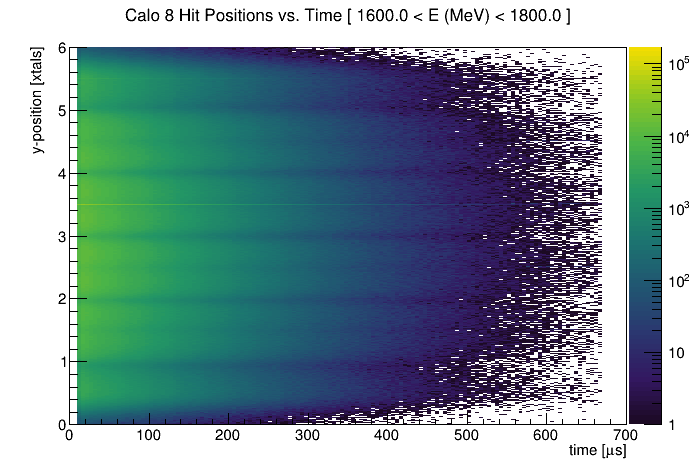

In [13]:
c = r.TCanvas()
energySlices[6].Draw("colz")
c.SetLogz()
c.Draw()

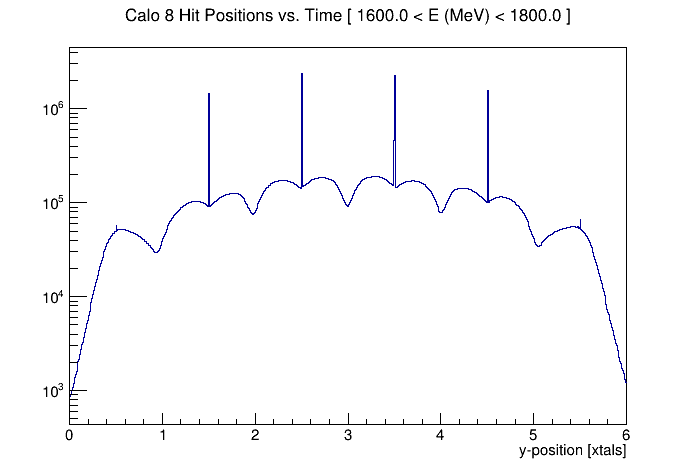

In [12]:
c = r.TCanvas()
energySlices[6].ProjectionY().Draw("colz")
c.SetLogy()
c.SetLogz()
c.Draw()

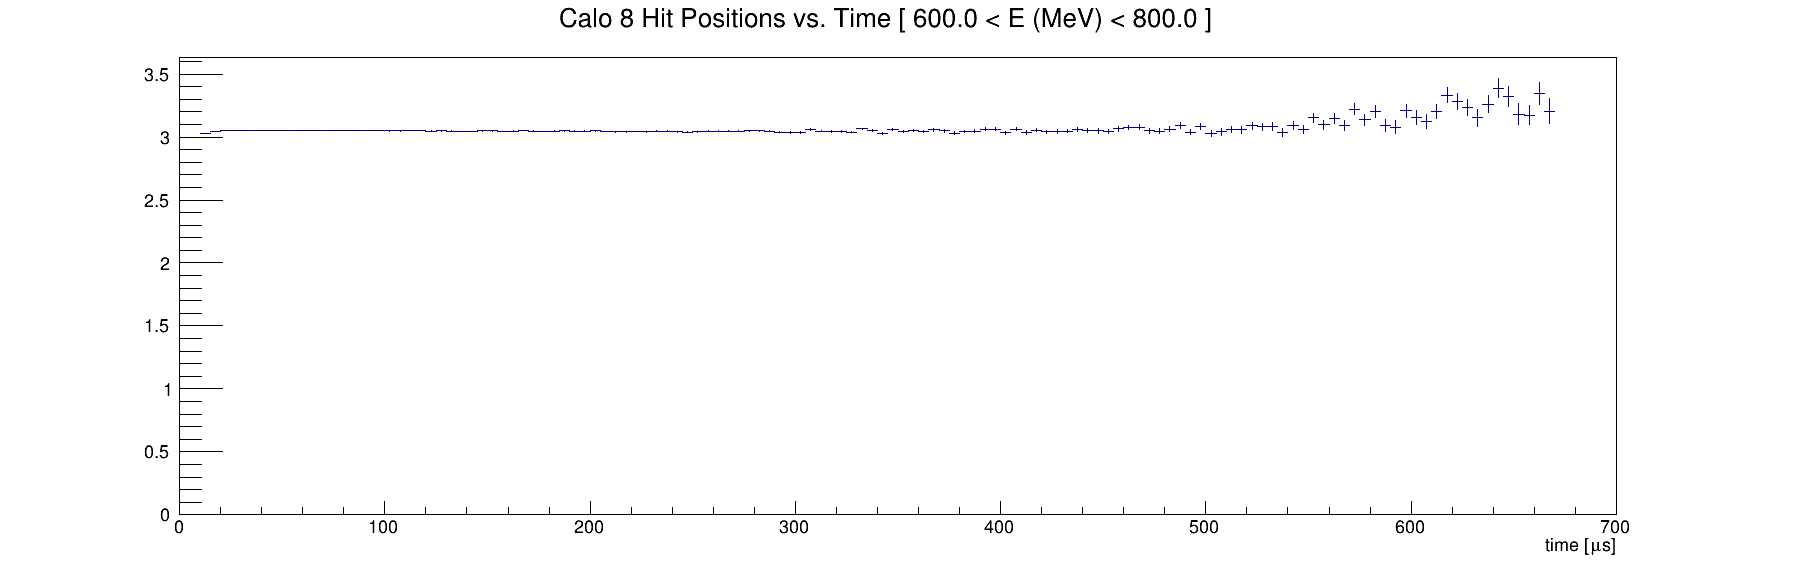

In [14]:
c = r.TCanvas("c","c",1800,600)
energySlices[1].GetXaxis().UnZoom()
energySlices[1].ProfileX().Draw("colz")
c.SetLogz()
c.Draw()

Starting bin: 10
Starting bin: 20
Starting bin: 30
Starting bin: 40
Starting bin: 50
Starting bin: 60
Starting bin: 70
Starting bin: 80
Starting bin: 90
Starting bin: 100
Starting bin: 110
Starting bin: 120
Starting bin: 130
Starting bin: 140


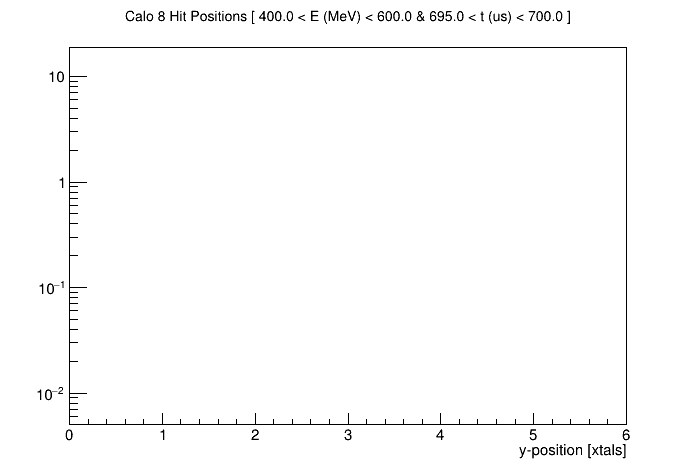

In [15]:
energySlice = 1
hi = energySlices[energySlice]
hi.GetXaxis().UnZoom()
h_mean = hi.ProjectionX().Clone("h_mean")
h_mean.Reset()

eMin = h3.GetZaxis().GetBinCenter(energySlice) - h3.GetZaxis().GetBinWidth(energySlice)/2.0
eMax = h3.GetZaxis().GetBinCenter(energySlice) + h3.GetZaxis().GetBinWidth(energySlice)/2.0

c = r.TCanvas()
c.SetLogy()

fits = []

for bin in range(1, NbinsTime+1):
    if(bin % 10 == 0):
        print("Starting bin:", bin)
    hi.GetXaxis().SetRange(bin,bin)
    h2 = hi.ProjectionY("", bin, bin)
    tMin = h3.GetXaxis().GetBinCenter(bin) - h3.GetXaxis().GetBinWidth(bin)/2.0
    tMax = h3.GetXaxis().GetBinCenter(bin) + h3.GetXaxis().GetBinWidth(bin)/2.0
    #h2.SetTitle("Bin "+str(bin))
    h2.SetTitle("Calo "+str(calo)+
                " Hit Positions [ "+str(eMin)+" < E (MeV) < "+str(eMax)+" & "+str(tMin)+" < t (us) < "+str(tMax)+" ]")
    h2.Draw()
    if(h2.GetEntries() > 100):
        f1.SetParameters(1,1,1)
        for fwodnweo in range(2):
            h2.Fit(f1,"RQ")
        f2.SetParameters(f1.GetParameter(0),f1.GetParameter(1),f1.GetParameter(2))
        f2.FixParameter(1, f1.GetParameter(1))
        for fwodnweo in range(1):
            h2.Fit(f2,"RQ")
        fits.append(( h3.GetXaxis().GetBinCenter(bin),
                    [f2.GetParameter(x) for x in range(3)],
                    [f2.GetParError(x) for x in range(3)],
                    [f2.GetChisquare(), f2.GetNDF()],
                    [f1.GetParameter(x) for x in range(3)],
                    [f1.GetParError(x) for x in range(3)],
                    [f1.GetChisquare(), f1.GetNDF()]))
        h_mean.SetBinContent(bin, f2.GetParameter(1))
        #h_mean.SetBinError(bin, f2.GetParameter(2))
        h_mean.SetBinError(bin, f1.GetParError(1))
    c.Draw()
    #c.Print("./images/PositionMovie_"+str(focus)+"_"+str(bin).zfill(3)+".png")
    

 FCN=92944 FROM MINOS     STATUS=SUCCESSFUL      8 CALLS         175 TOTAL
                     EDM=3.66993e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.12055e+00   3.10164e-04  -0.00000e+00   2.80634e+02
   2  p1           3.45947e-04   2.22285e-06   2.22285e-06   8.98670e+00
 FCN=92944 FROM MINOS     STATUS=SUCCESSFUL      8 CALLS         149 TOTAL
                     EDM=1.25645e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.12055e+00   3.10176e-04  -0.00000e+00   7.43609e+02
   2  p1           3.45947e-04   2.22294e-06   2.22294e-06  -4.39205e+00


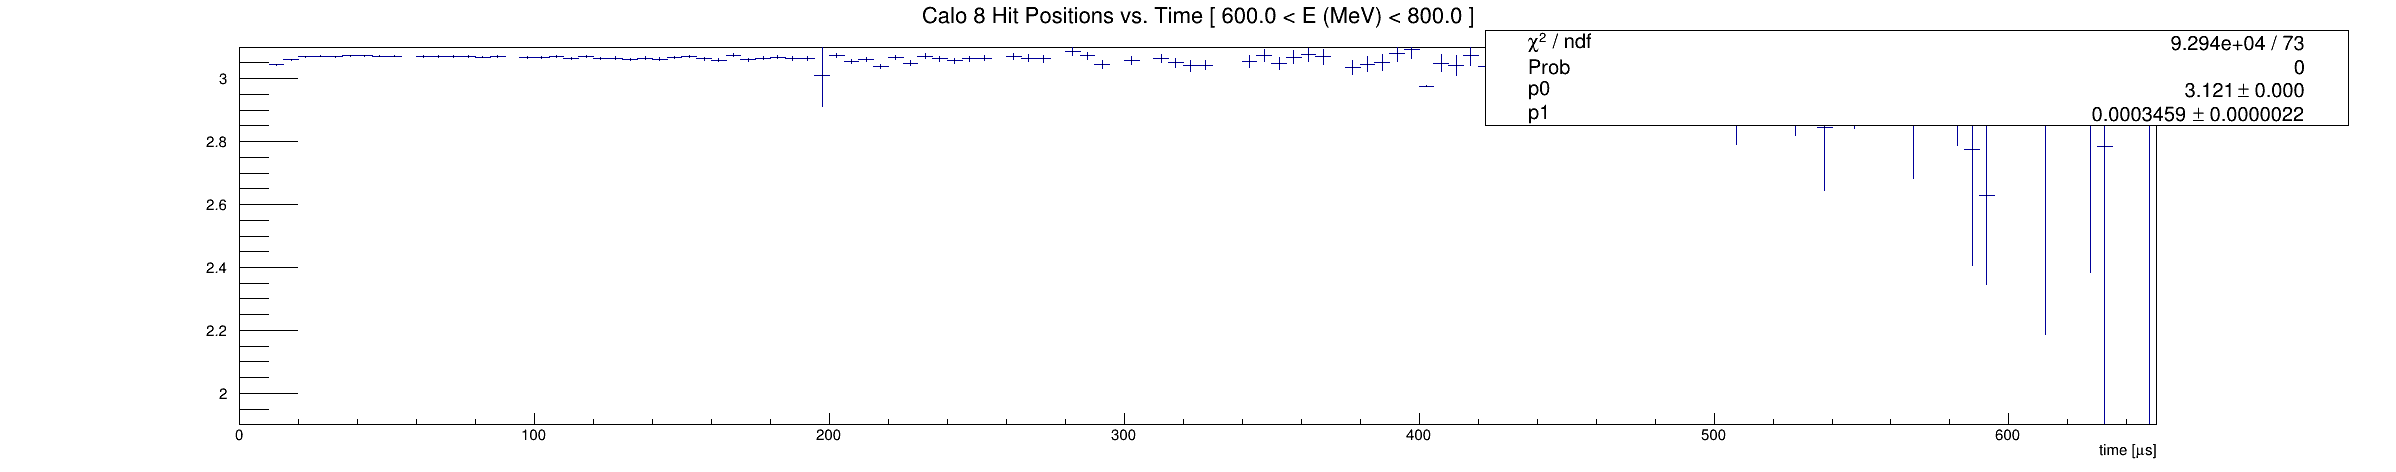

In [16]:
flin = r.TF1("flin", "pol1", 25, 400, 2)
flin.SetParameters(3,-0.0001)
flin.SetParLimits(0,0,100000)

c = r.TCanvas("c","c",2400,500)
h_mean.Draw("ple")
h_mean.GetXaxis().SetRangeUser(0,650)
h_mean.GetYaxis().SetRangeUser(1.9,3.1)
for i in range(2):
    h_mean.Fit(flin,"REM")
#flin.Draw("SAME")
#c.SetLogy()
c.Draw()

In [17]:
print(len(fits[0]),fits[0])

7 (12.5, [9183.70341486429, 3.044727358390733, 1.6997915918729838], [7.662990025066874, 0.0, 0.0026113528819347196], [68853.96726585484, 382], [9299.744182664568, 3.044727358390733, 1.6892343820735463], [7.565291214118393, 0.001570509269255019, 0.0024946897535379486], [726754.3432560904, 397])


In [18]:
bins, pars, errs, chi2s, pars_f1, errs_f1, chi2s_f1 = zip(*fits)

In [19]:
pars[1]

[11145.604386317373, 3.0603921299561403, 1.7377435316266625]

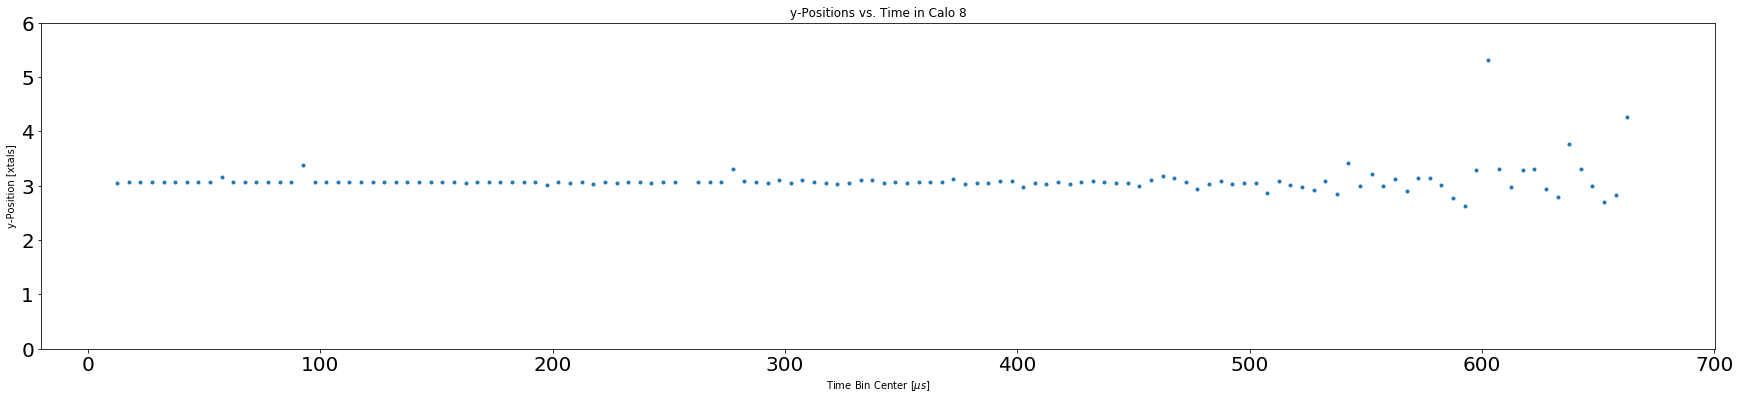

In [20]:
parameter = 1
fig,ax = plt.subplots(figsize=(30,6))
plt.title(focus+"-Positions vs. Time in Calo "+str(calo))
plt.xlabel(r"Time Bin Center [$\mu s$]")
plt.ylabel(focus+"-Position [xtals]")
parsi = [x[parameter] for x in pars]
errsi = [x[parameter] for x in errs]
plt.ylim(0,6)
plt.errorbar(bins, parsi, yerr=errsi, fmt=".")
plt.show()

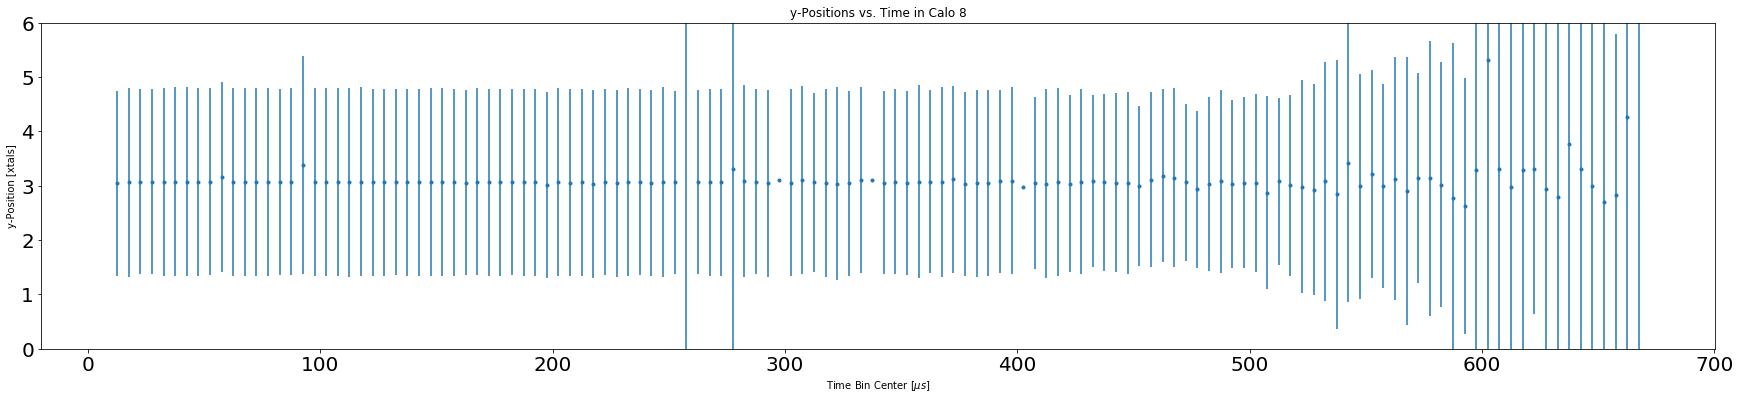

In [21]:
fig,ax = plt.subplots(figsize=(30,6))
plt.title(focus+"-Positions vs. Time in Calo "+str(calo))
plt.xlabel(r"Time Bin Center [$\mu s$]")
plt.ylabel(focus+"-Position [xtals]")
parsi = [x[1] for x in pars]
errsi = [x[2] for x in pars]
plt.ylim(0,6)
plt.errorbar(bins, parsi, yerr=errsi, fmt=".")
plt.show()

---

### Ok, so now lets automate the creation of these plots

Starting calo 1
     Energy bin: 7 ; Covering energy range 1600.0 - 2600.0
     Number of time bins: 28
Starting calo 2
     Energy bin: 7 ; Covering energy range 1600.0 - 2600.0
     Number of time bins: 28
Starting calo 3
     Energy bin: 7 ; Covering energy range 1600.0 - 2600.0
     Number of time bins: 28
Starting calo 4
     Energy bin: 7 ; Covering energy range 1600.0 - 2600.0
     Number of time bins: 28
Starting calo 5
     Energy bin: 7 ; Covering energy range 1600.0 - 2600.0
     Number of time bins: 28
Starting calo 6
     Energy bin: 7 ; Covering energy range 1600.0 - 2600.0
     Number of time bins: 28
Starting calo 7
     Energy bin: 7 ; Covering energy range 1600.0 - 2600.0
     Number of time bins: 28
Starting calo 8
     Energy bin: 7 ; Covering energy range 1600.0 - 2600.0
     Number of time bins: 28
Starting calo 9
     Energy bin: 7 ; Covering energy range 1600.0 - 2600.0
     Number of time bins: 28
Starting calo 10
     Energy bin: 7 ; Covering energy range 1600

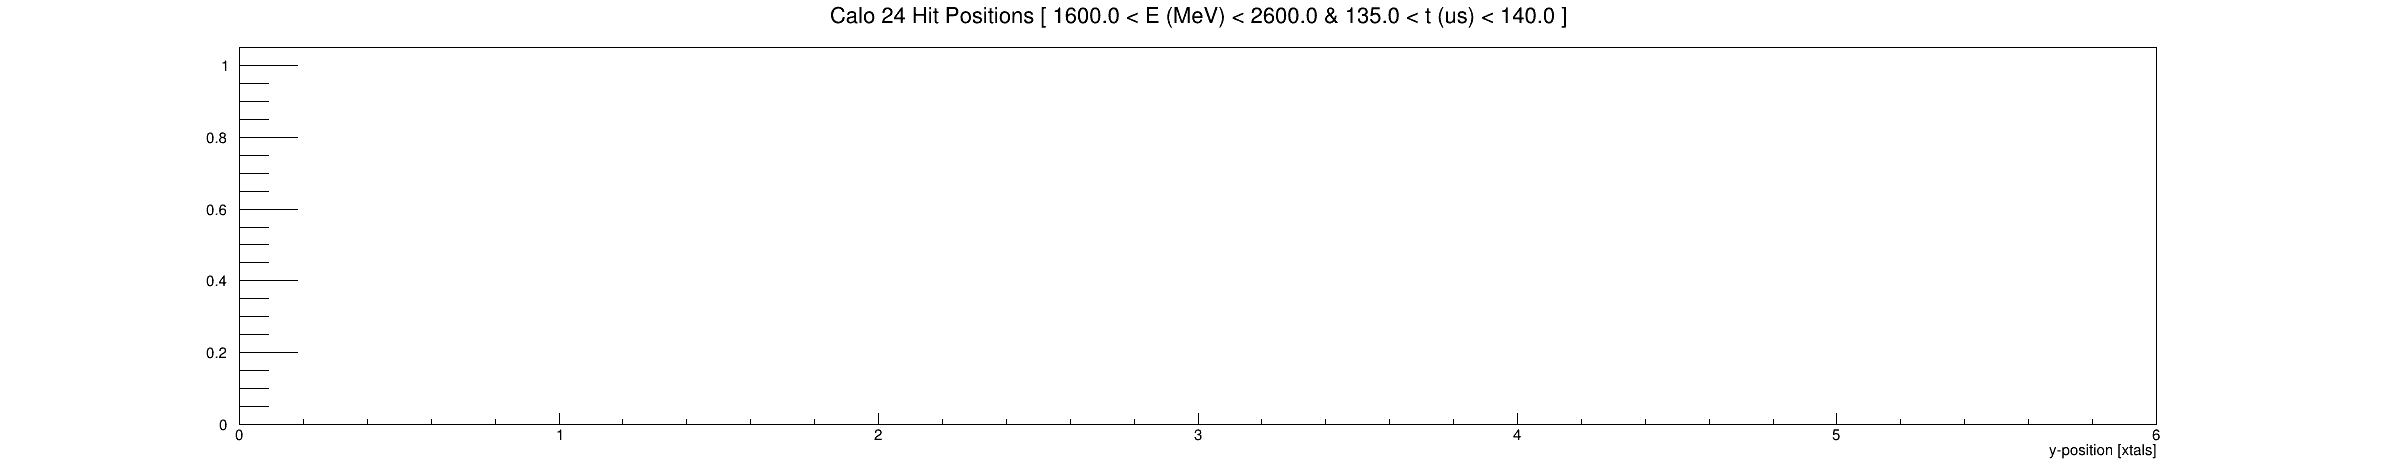

In [22]:
energyBin = 7
energyBinHigh = 11
slicesByCalo = []
fitsByCalo = []
meansByCalo = []
devsByCalo = []

timeRebinFactor = 5
positionRebinFactor = 1

for calo in range(1,25):
    print("Starting calo", calo)
    
    h3 = f.Get("farline").Get("calo"+str(calo)).Get(yHistName).Clone()
    h3.GetYaxis().SetTitle("y-position [xtals]")
    
    #get the histogram for this calorimeter
    h3.GetZaxis().SetRange(energyBin,energyBinHigh)
    eMin = h3.GetZaxis().GetBinCenter(energyBin) - h3.GetZaxis().GetBinWidth(energyBin)/2.0
    eMax = h3.GetZaxis().GetBinCenter(energyBinHigh) + h3.GetZaxis().GetBinWidth(energyBinHigh)/2.0
    print("     Energy bin:", energyBin, "; Covering energy range", eMin,"-", eMax)
    hi = h3.Project3D("yx").Clone("h_E"+str(bin).zfill(2))
    hi.Rebin2D(timeRebinFactor, positionRebinFactor)
    hi.SetTitle("Calo "+str(calo)+
                " Hit Positions vs. Time [ "+str(eMin)+" < E (MeV) < "+str(eMax)+" ]")
    slicesByCalo.append(hi.Clone("h3_E"+str(energyBin).zfill(2)+"_Calo"+str(calo)))
        
    hi.GetXaxis().UnZoom()
    h_mean = hi.ProjectionX().Clone("h_mean")
    h_mean.Reset()
    h_stdev = h_mean.Clone("h_stdev")
    
    fits = []

    print("     Number of time bins:", hi.GetNbinsX())
    for bin in range(1, hi.GetNbinsX()+1):
        if(bin % 50 == 0):
            print("        Starting time bin:", bin)
        hi.GetXaxis().SetRange(bin,bin)
        h2 = hi.ProjectionY("", bin, bin)
        tMin = h3.GetXaxis().GetBinCenter(bin) - h3.GetXaxis().GetBinWidth(bin)/2.0
        tMax = h3.GetXaxis().GetBinCenter(bin) + h3.GetXaxis().GetBinWidth(bin)/2.0
        #h2.SetTitle("Bin "+str(bin))
        h2.SetTitle("Calo "+str(calo)+
                    " Hit Positions [ "+str(eMin)+" < E (MeV) < "+str(eMax)+" & "+str(tMin)+" < t (us) < "+str(tMax)+" ]")
        h2.Draw()
        if(h2.GetEntries() > 100):
            f1.SetParameters(1,1,1)
            for fwodnweo in range(2):
                h2.Fit(f1,"RQ")
            f2.SetParameters(f1.GetParameter(0),f1.GetParameter(1),f1.GetParameter(2))
            f2.FixParameter(1, f1.GetParameter(1))
            for fwodnweo in range(1):
                h2.Fit(f2,"RQ")
            fits.append(( h3.GetXaxis().GetBinCenter(bin),
                        [f2.GetParameter(x) for x in range(3)],
                        [f2.GetParError(x) for x in range(3)],
                        [f2.GetChisquare(), f2.GetNDF()],
                        [f1.GetParameter(x) for x in range(3)],
                        [f1.GetParError(x) for x in range(3)],
                        [f1.GetChisquare(), f1.GetNDF()]))
            h_mean.SetBinContent(bin, f1.GetParameter(1))
            h_mean.SetBinError(bin, f1.GetParError(1))
            h_stdev.SetBinContent(bin, f1.GetParameter(2))
            h_stdev.SetBinError(bin, f1.GetParError(2))
        c.Draw()
        #c.Print("./images/PositionMovie_"+str(focus)+"_"+str(bin).zfill(3)+".png")
    meansByCalo.append(h_mean.Clone("h_mean_"+str(calo)))
    devsByCalo.append(h_stdev.Clone("h_stdev_"+str(calo)))
    fitsByCalo.append((calo, fits))

In [23]:
print(fitsByCalo[0][0], fitsByCalo[0][1][0])
print(meansByCalo)
print(devsByCalo)

1 (2.5, [127173.32379090192, 3.071771316951213, 1.418612653720076], [28.594354800656056, 0.0, 0.0004268015458645771], [1611314.6547809567, 382], [128778.70923857624, 3.071771316951213, 1.4147214508653427], [28.269498916017323, 0.0003220115257292909, 0.00041634707933302373], [6563862.441118638, 397])
[<ROOT.TH1D object ("h_mean_1") at 0x7f7df36d07d0>, <ROOT.TH1D object ("h_mean_2") at 0x7fffd4d9cca0>, <ROOT.TH1D object ("h_mean_3") at 0x7fffd5b44e70>, <ROOT.TH1D object ("h_mean_4") at 0x7fffd5cb5670>, <ROOT.TH1D object ("h_mean_5") at 0x7f7df369ab80>, <ROOT.TH1D object ("h_mean_6") at 0x7f7df3374080>, <ROOT.TH1D object ("h_mean_7") at 0x7f7df36a0750>, <ROOT.TH1D object ("h_mean_8") at 0x7f7df36d7fc0>, <ROOT.TH1D object ("h_mean_9") at 0x7f7df36d7310>, <ROOT.TH1D object ("h_mean_10") at 0x7f7df36d6080>, <ROOT.TH1D object ("h_mean_11") at 0x7f7df185b7c0>, <ROOT.TH1D object ("h_mean_12") at 0x7f7df1864e20>, <ROOT.TH1D object ("h_mean_13") at 0x7f7df33e74f0>, <ROOT.TH1D object ("h_mean_14")

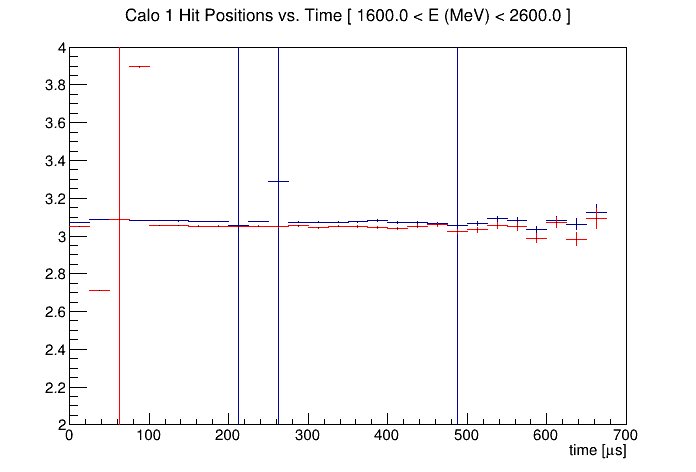

In [24]:
c = r.TCanvas()
meansByCalo[0].Draw("")
meansByCalo[0].GetYaxis().SetRangeUser(2,4)
meansByCalo[1].SetLineColor(2)
meansByCalo[1].Draw(" same")
c.Draw()

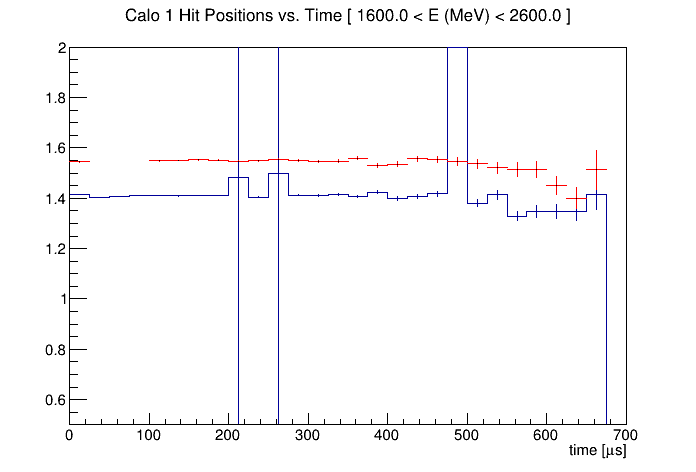

In [25]:
c = r.TCanvas()
devsByCalo[0].Draw("hist e")
devsByCalo[0].GetYaxis().SetRangeUser(0.5,2)
devsByCalo[1].SetLineColor(2)
devsByCalo[1].Draw("SAME")
c.Draw()

In [26]:
npar = 2
flin = r.TF1("flin", "pol"+str(npar-1), 25, 600, npar)
flin.SetParameters(3,-0.0001)
flin.SetParLimits(0,0,100000)

[([3.08712124892363, -4.696306293888609e-05], [0.0002823344169566866, 2.720854072797218e-06], [34.89006436449455, 21]), ([2.7955626114850585, 0.001338516006901906], [0.0005588875362505519, 3.7072937069325827e-06], [274586.68176645617, 21]), ([3.1523041022385456, -5.2366389452665626e-05], [0.00034684653760219675, 3.1390392918624755e-06], [47.97446180870622, 21]), ([3.0875747445535673, -6.0340333039593714e-05], [0.0003301740908456807, 2.986774127138432e-06], [65.39065482531691, 21]), ([3.3238502465837705, -8.903655147317731e-05], [0.0005746000453221711, 5.171914133959528e-06], [58.27904903426967, 21]), ([3.355771563667842, 0.0006361823452987796], [0.0003996225739211212, 3.374107136674241e-06], [2298820.744195219, 21]), ([3.0907341495911567, -6.494935730923865e-05], [0.00032016199136286616, 2.9000896712884942e-06], [57.21954613457561, 21]), ([2.9476959691965288, 0.0006033788275695487], [0.000373634426176217, 3.1800169117516804e-06], [134079.18718237683, 21]), ([3.026950196532985, -7.89033

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>:

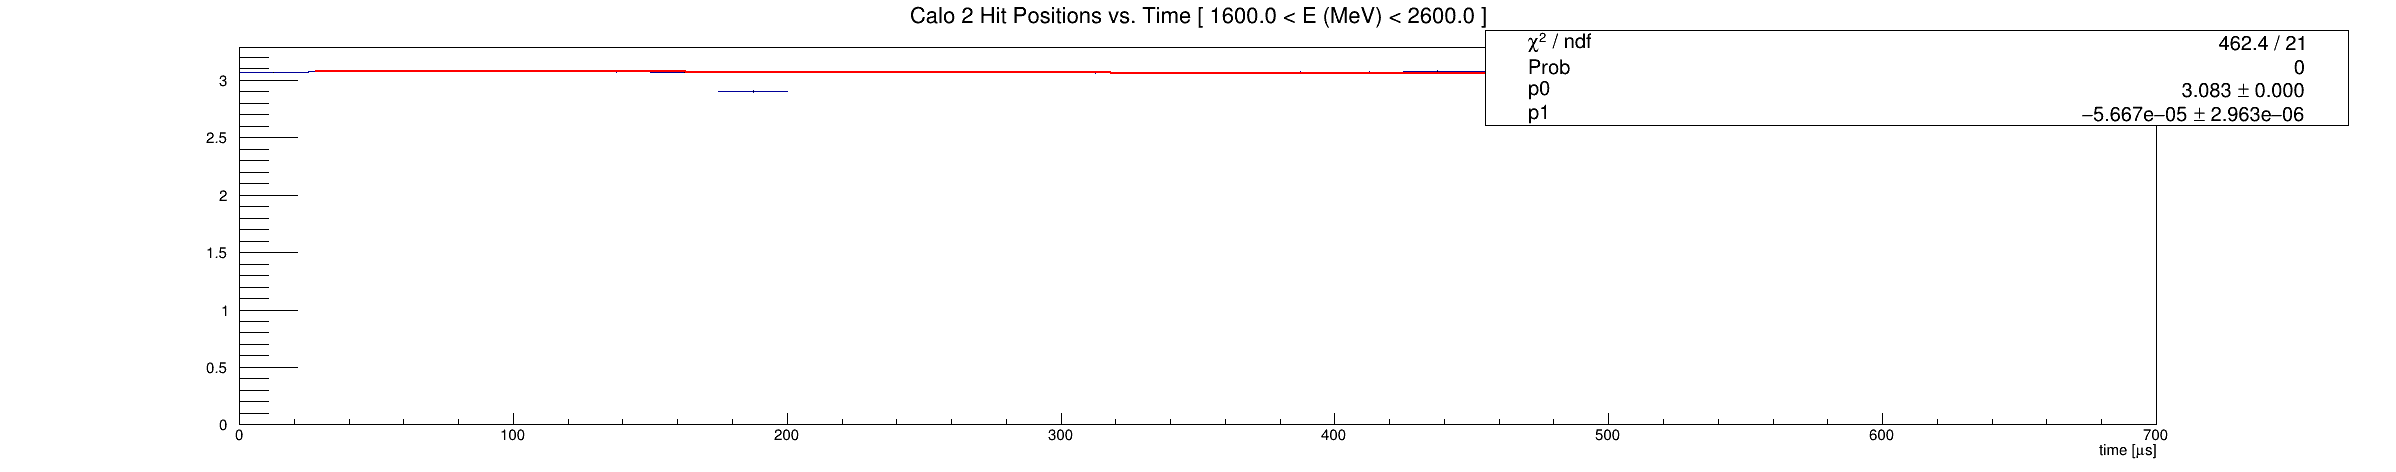

In [27]:
linearFits_mean = []
for i, h_mean in enumerate(meansByCalo):
    flin.SetParameters(3,-0.0001)
    
    c = r.TCanvas("c","c",2400,500)
    h_mean.Draw("ple")
    #h_mean.GetXaxis().SetRangeUser(0,650)
    #h_mean.GetYaxis().SetRangeUser(1.9,3.1)
    for i in range(2):
        h_mean.Fit(flin,"REMQ")
    #flin.Draw("SAME")
    #c.SetLogy()
    
    linearFits_mean.append(([flin.GetParameter(x) for x in range(npar)], 
                            [flin.GetParError(x) for x in range(npar)], 
                            [flin.GetChisquare(), flin.GetNDF()]))
    
    c.Draw()
print(linearFits_mean)

[([3.08712124892363, -4.696306293888609e-05], [0.0002823344169566866, 2.720854072797218e-06], [34.89006436449455, 21]), ([2.7955626114850585, 0.001338516006901906], [0.0005588875362505519, 3.7072937069325827e-06], [274586.68176645617, 21]), ([3.1523041022385456, -5.2366389452665626e-05], [0.00034684653760219675, 3.1390392918624755e-06], [47.97446180870622, 21]), ([3.0875747445535673, -6.0340333039593714e-05], [0.0003301740908456807, 2.986774127138432e-06], [65.39065482531691, 21]), ([3.3238502465837705, -8.903655147317731e-05], [0.0005746000453221711, 5.171914133959528e-06], [58.27904903426967, 21]), ([3.355771563667842, 0.0006361823452987796], [0.0003996225739211212, 3.374107136674241e-06], [2298820.744195219, 21]), ([3.0907341495911567, -6.494935730923865e-05], [0.00032016199136286616, 2.9000896712884942e-06], [57.21954613457561, 21]), ([2.9476959691965288, 0.0006033788275695487], [0.000373634426176217, 3.1800169117516804e-06], [134079.18718237683, 21]), ([3.026950196532985, -7.89033

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>:

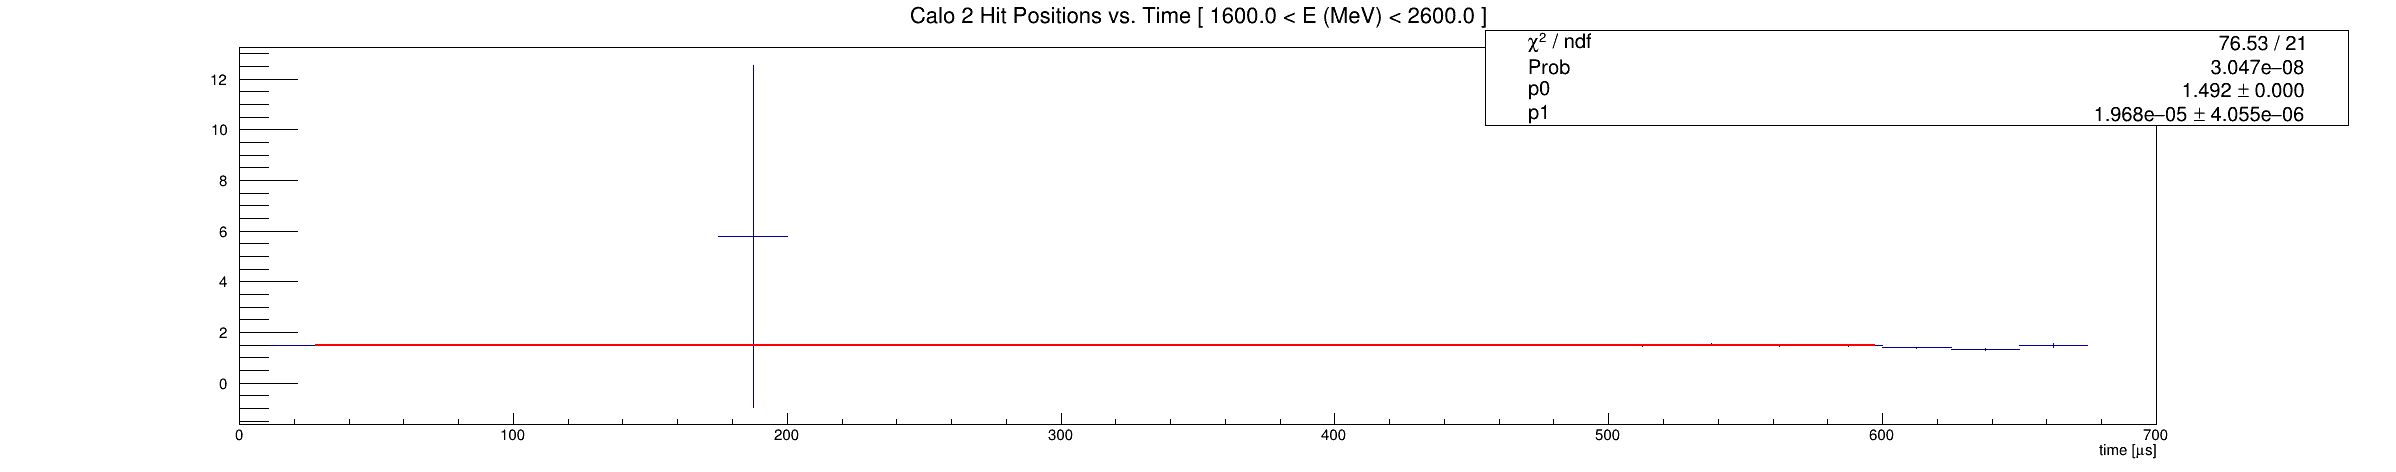

In [28]:
linearFits_stdev = []
for i, h_mean in enumerate(devsByCalo):
    flin.SetParameters(3,-0.0001)
    
    c = r.TCanvas("c","c",2400,500)
    h_mean.Draw("ple")
    #h_mean.GetXaxis().SetRangeUser(0,650)
    #h_mean.GetYaxis().SetRangeUser(1.9,3.1)
    for i in range(2):
        h_mean.Fit(flin,"REMQ")
    #flin.Draw("SAME")
    #c.SetLogy()
    
    linearFits_stdev.append(([flin.GetParameter(x) for x in range(npar)], 
                            [flin.GetParError(x) for x in range(npar)], 
                            [flin.GetChisquare(), flin.GetNDF()]))
    
    c.Draw()
print(linearFits_mean)

In [29]:
for x in linearFits_mean:
    print(x)

([3.08712124892363, -4.696306293888609e-05], [0.0002823344169566866, 2.720854072797218e-06], [34.89006436449455, 21])
([2.7955626114850585, 0.001338516006901906], [0.0005588875362505519, 3.7072937069325827e-06], [274586.68176645617, 21])
([3.1523041022385456, -5.2366389452665626e-05], [0.00034684653760219675, 3.1390392918624755e-06], [47.97446180870622, 21])
([3.0875747445535673, -6.0340333039593714e-05], [0.0003301740908456807, 2.986774127138432e-06], [65.39065482531691, 21])
([3.3238502465837705, -8.903655147317731e-05], [0.0005746000453221711, 5.171914133959528e-06], [58.27904903426967, 21])
([3.355771563667842, 0.0006361823452987796], [0.0003996225739211212, 3.374107136674241e-06], [2298820.744195219, 21])
([3.0907341495911567, -6.494935730923865e-05], [0.00032016199136286616, 2.9000896712884942e-06], [57.21954613457561, 21])
([2.9476959691965288, 0.0006033788275695487], [0.000373634426176217, 3.1800169117516804e-06], [134079.18718237683, 21])
([3.026950196532985, -7.89033772862591

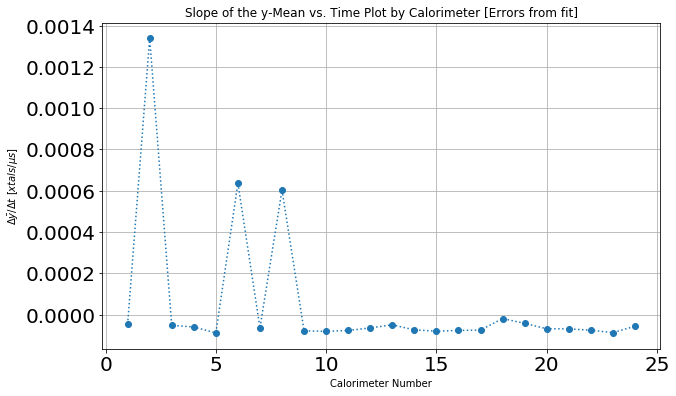

In [30]:
xvals = [x+1 for x in range(len(linearFits_mean))]
xerr = 0
yvals = [x[0][1] for x in linearFits_mean]
yerr = [x[1][1] for x in linearFits_mean]

fig,ax = plt.subplots(figsize=(10,6))

plt.title("Slope of the y-Mean vs. Time Plot by Calorimeter [Errors from fit]")
plt.xlabel("Calorimeter Number")
plt.ylabel(r"$\Delta \bar{y} / \Delta t$ $[xtals/ \mu s]$")

plt.errorbar(xvals, yvals, yerr=yerr, xerr=xerr, fmt="o:")
plt.grid()
plt.show()

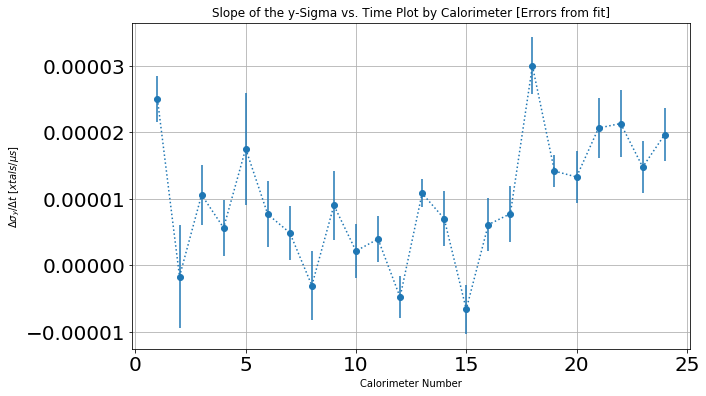

In [31]:
xvals = [x+1 for x in range(len(linearFits_stdev))]
xerr = 0
yvals = [x[0][1] for x in linearFits_stdev]
yerr = [x[1][1] for x in linearFits_stdev]

fig,ax = plt.subplots(figsize=(10,6))

plt.title("Slope of the y-Sigma vs. Time Plot by Calorimeter [Errors from fit]")
plt.xlabel("Calorimeter Number")
plt.ylabel(r"$\Delta \sigma_{y} / \Delta t$ $[xtals/ \mu s]$")

plt.errorbar(xvals, yvals, yerr=yerr, xerr=xerr, fmt="o:")
plt.grid()
plt.show()